In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


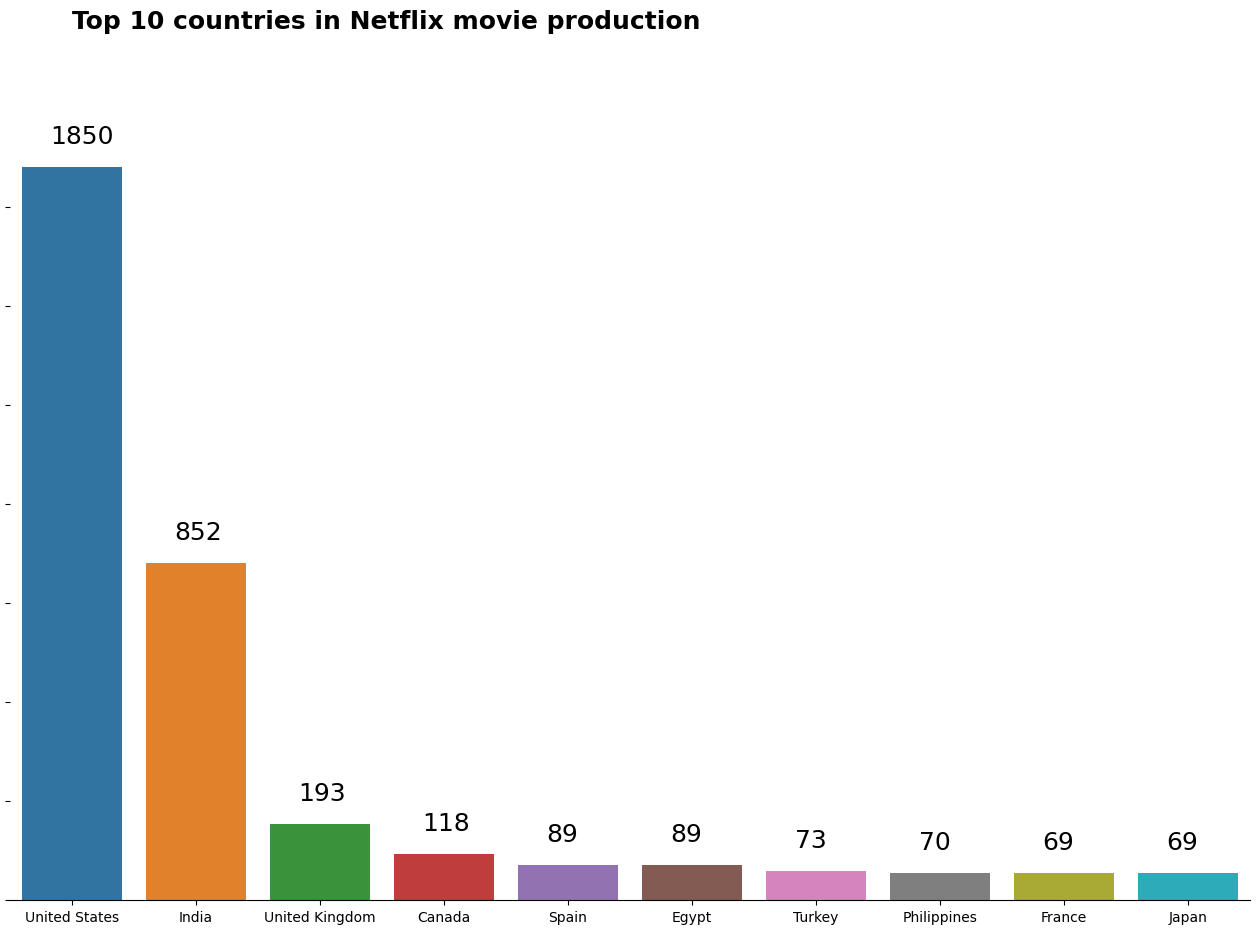

In [8]:
movies = data[data["type"] == "Movie" ]
top_movies = movies.groupby(["country"]).size().sort_values(ascending = False)[0:10]

plt.figure(figsize = (16,10))
graph = sns.barplot(x= top_movies.index, y=top_movies)
graph.text(0,2200, "Top 10 countries in Netflix movie production", fontsize= 18, fontweight = "bold", color = "black")

for i in ["top", "left", "right"]:
    graph.spines[i].set_visible(False)


for i in graph.patches:
    graph.text(i.get_x()+i.get_width()/3.5, i.get_height()+60, round(i.get_height()), fontsize = 18)

graph.set(yticklabels = [])
plt.xlabel("")
plt.ylabel("")
plt.show()

C:\Users\Marcel\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marcel\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marcel\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marcel\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

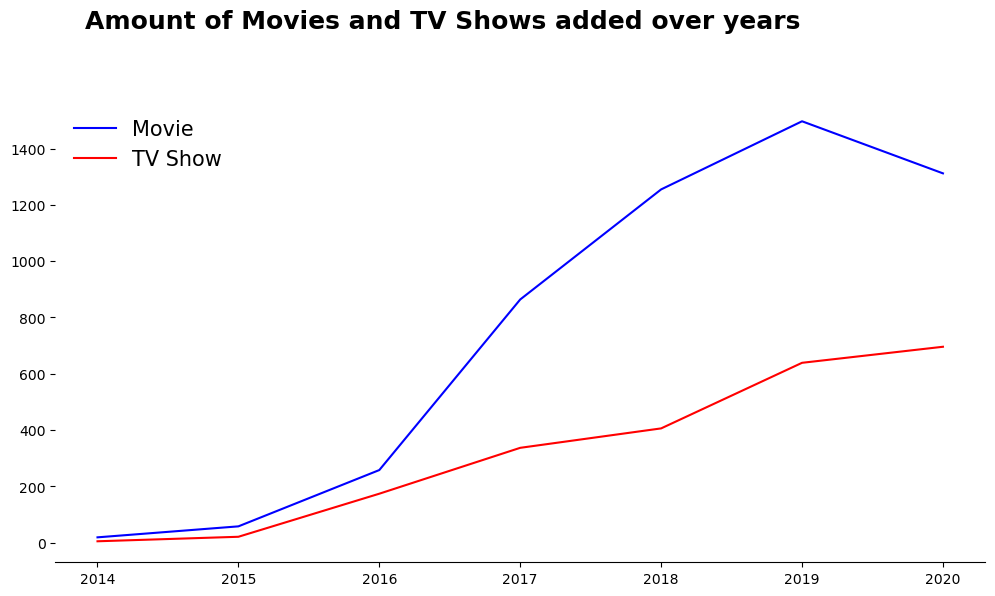

In [26]:
data["date_added"] = pd.to_datetime(data["date_added"])
data["year_added"] = data["date_added"].dt.year 
index = [2014,2015,2016,2017,2018,2019,2020]

#Movies added from 2014 to 2020
ts_data = data[data["year_added"]>2013]
ts_data = ts_data[ts_data["year_added"]<2021].groupby("type")["year_added"].value_counts().unstack().T

fig,ax = plt.subplots(1, 1, figsize = (12, 6))
fig.text(0.15,1, "Amount of Movies and TV Shows added over years", fontsize = 18, fontweight = "bold", color = "black")

g1 = sns.lineplot(x = ts_data.index, y =ts_data["Movie"], color = "blue", label = "Movie")
g2 = sns.lineplot(x = ts_data.index, y = ts_data["TV Show"], color = "red", label = "TV Show")

for i in ["top", "left", "right"]:
    ax.spines[i].set_visible(False)

ax.legend(loc = "upper left", frameon = False, prop = {"size" : 15})
plt.xlabel("")
plt.ylabel("")
1
plt.show()